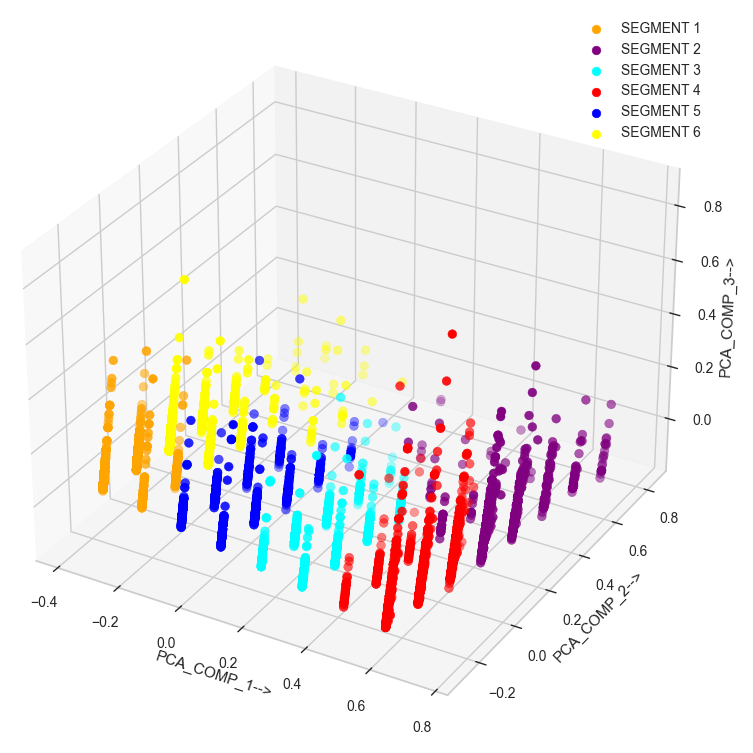

<span style="color:#12AD2B;font-size:36px;font-family:arial">Dataset Story</span>
<p><span style="font-size:16px;font-family:arial"> Bangalore has more than 12,000 restaurants those are serving dishes from all over the world and the purpose of analysing of Zomato Bangalore Restaurants dataset is to find the key factors affecting the success of those restaurants. </span></p>
<p><span style="font-size:16px;font-family:arial"> Bangalore, India's largest IT exporter, is often referred to as the silicon valley of India. Most of the people here are immigrants and dependent mainly on the restaurant food as they don’t have time to cook for themselves. As the time goes on, new restaurants are opening, the industry is not saturated yet and the demand is increasing day by day. In spite of increasing demand, it has become difficult for new restaurants to compete with established restaurants.</span></p>
<p><span style="font-size:16px;font-family:arial"><b>Phase I</b></span></p>
<p><span style="font-size:16px;font-family:arial">Success Prediction of Zomato Bangalore Restaurants</span></p>
<p><span style="font-size:16px;font-family:arial"><b>Phase II</b></span></p>
<p><span style="font-size:16px;font-family:arial">Clustering of Restaurants</span></p>

 <span style="color:#12AD2B;font-size:36px;font-family:arial"> Variables & Descriptions: </span>
 <hr>
 
 <span style="font-size:24px;font-family:arial;">
    <table style='font-family:"Arial"; font-size:14px'>
      <colgroup span="4"></colgroup>
      <tr>
        <th>Variable</th>
        <th>Description</th>
      </tr>
      <tr>
        <td>url:</td>
        <td>contains the url of the restaurant in the zomato website</td>
      </tr>
      <tr>
        <td>address:</td>
        <td>contains the address of the restaurant in Bangalore</td>
      </tr>
      <tr>
        <td>name:</td>
        <td>contains the address of the restaurant in Bangalore</td>
      </tr>
      <tr>
        <td>online_order:</td>
        <td>whether online ordering is available in the restaurant or not</td>
      </tr>
      <tr>
        <td>book_table:</td>
        <td>table book option available or not</td>
      </tr>
      <tr>
        <td>rate:</td>
        <td>contains the overall rating of the restaurant out of 5</td>
      </tr>
      <tr>
        <td>votes:</td>
        <td>contains total number of rating for the restaurant as of the above mentioned date</td>
      </tr>
      <tr>
        <td>phone:</td>
        <td>contains the phone number of the restaurant</td>
      </tr>
      <tr>
        <td>location:</td>
        <td>contains the neighborhood in which the restaurant is located</td>
      </tr>
      <tr>
        <td>rest_type:</td>
        <td>restaurant type</td>
      </tr>
      <tr>
        <td>dish_liked:</td>
        <td>dishes people liked in the restaurant</td>
      </tr>
      <tr>
        <td>rest_type:</td>
        <td>restaurant type</td>
      </tr>
      <tr>
        <td>cuisines:</td>
        <td>food styles, separated by comma</td>
      </tr>
      <tr>
        <td>approx_cost(for two people):</td>
        <td>contains the approximate cost for meal for two people</td>
      </tr>
      <tr>
        <td>reviews_list:</td>
        <td>list of tuples containing reviews for the restaurant, each tuple</td>
      </tr>
      <tr>
        <td>menu_item:</td>
        <td>contains list of menus available in the restaurant</td>
      </tr>
      <tr>
        <td>listed_in(city):</td>
        <td>contains the neighborhood in which the restaurant is listed</td>
      </tr>
    </table>    
 </span>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_validate, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings

warnings.simplefilter(action='ignore', category=Warning)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [2]:
data = pd.read_csv('../input/zomato-bangalore-restaurants/zomato.csv')

In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df = df.drop_duplicates(subset=['address', 'name']).reset_index().drop('index', axis=1)
# dropping duplicated restaurants

<span style="color:#12AD2B;font-size:36px;font-family:arial">Exploratory Data Analysis</span>

In [6]:
df['approx_cost(for two people)'] = (df['approx_cost(for two people)'].str.replace(',', '')).astype('float64')

df['rate'] = df['rate'].replace('NEW', np.nan)
df['rate'] = df['rate'].replace('-', np.nan)
df['rate'] = (df['rate'].str.rstrip('/5')).astype('float64')

# these are actually numerical values seen as strings, we made some string operations to put them in the right format

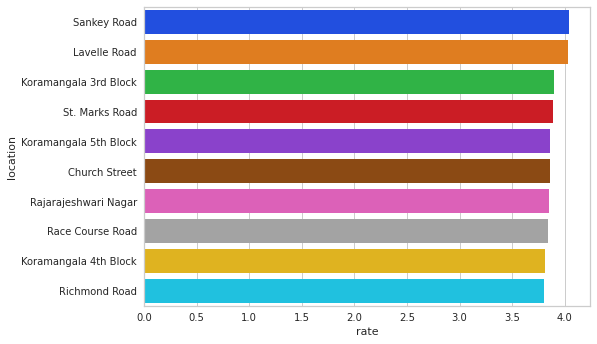

In [7]:
# location vs rate barplot
loc_rate = pd.DataFrame(df.groupby(['location'])['rate'].mean().sort_values(ascending=False).head(10))
loc_rate.reset_index(inplace=True)
ax = sns.barplot(x='rate', y='location', data=loc_rate, palette="bright")

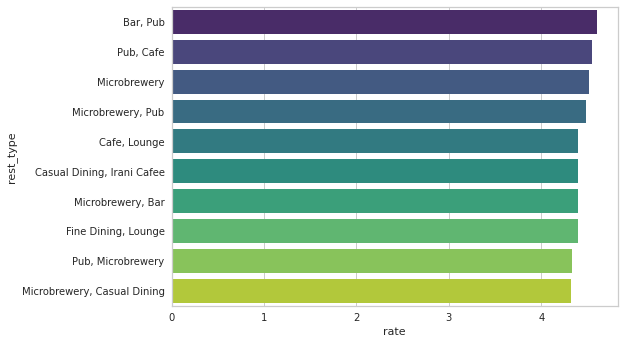

In [8]:
# rest_type vs rate barplot
restype_rate = pd.DataFrame(df.groupby(['rest_type'])['rate'].mean().sort_values(ascending=False).head(10))
restype_rate.reset_index(inplace=True)
ax = sns.barplot(x='rate', y='rest_type', data=restype_rate, palette="viridis")

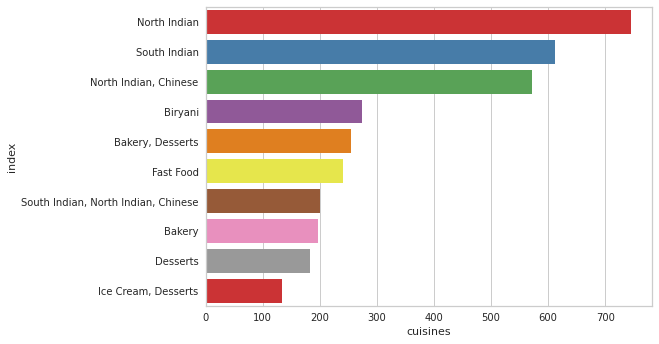

In [9]:
# cuisines barplot
cuisine_count = pd.DataFrame(df['cuisines'].value_counts().sort_values(ascending=False)[:10])
cuisine_count.reset_index(inplace=True)
ax = sns.barplot(y='index', x='cuisines', data=cuisine_count, palette="Set1")

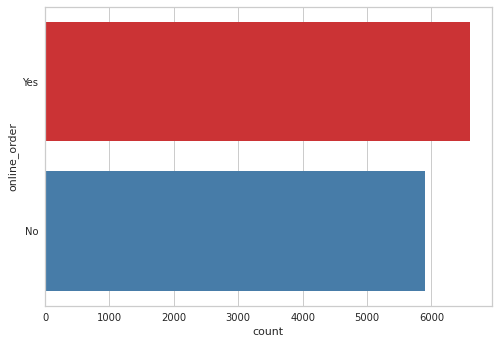

In [10]:
# online_order countplot
ax = sns.countplot(y='online_order', data=df, palette="Set1")

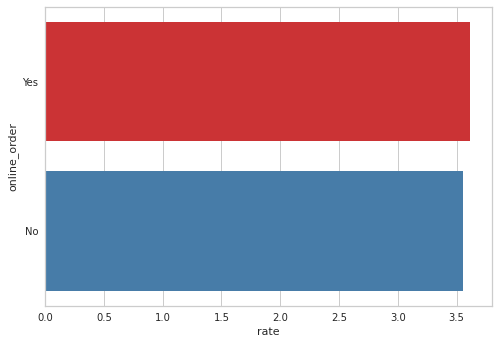

In [11]:
# online_order vs rate
online_rate = pd.DataFrame(df.groupby(['online_order'])['rate'].mean().sort_values(ascending=False).head(10))
online_rate.reset_index(inplace=True)
ax = sns.barplot(x='rate', y='online_order', data=online_rate, palette="Set1")

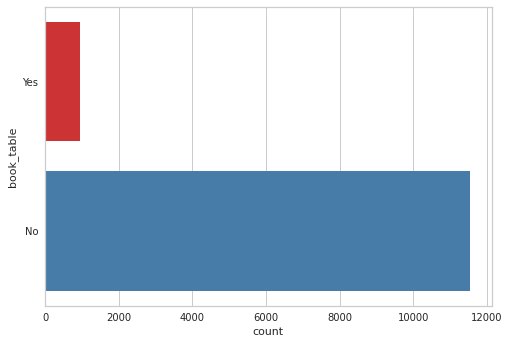

In [12]:
# book_table countplot
ax = sns.countplot(y='book_table', data=df, palette="Set1")

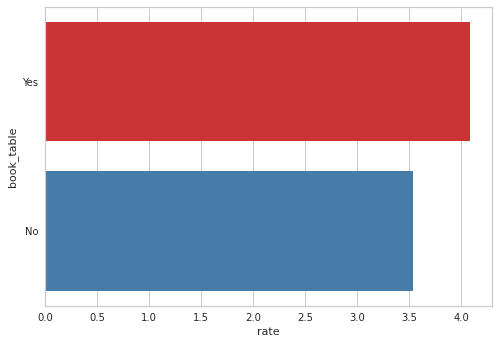

In [13]:
# book_table vs rate
book_rate = pd.DataFrame(df.groupby(['book_table'])['rate'].mean().sort_values(ascending=False).head(10))
book_rate.reset_index(inplace=True)
ax = sns.barplot(x='rate', y='book_table', data=book_rate, palette="Set1")

<span style="color:#12AD2B;font-size:36px;font-family:arial">Data Preprocessing & Feature Engineering</span>

In [14]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 12499
Variables: 17
cat_cols: 3
num_cols: 3
cat_but_car: 11
num_but_cat: 0


In [15]:
drop_list = ['url', 'address', 'phone', 'reviews_list', 'menu_item', 'name', 'listed_in(city)', 'listed_in(type)']
df.drop(drop_list, axis=1, inplace=True)
# We can drop some columns those have no useful data & low feature importance according to my previous trials

# Missing Data

In [16]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns
    
    
df.isnull().sum().sort_values(ascending=False)

dish_liked                     7891
rate                           3183
rest_type                        63
approx_cost(for two people)      59
cuisines                         19
location                          9
online_order                      0
book_table                        0
votes                             0
dtype: int64

In [17]:
# dropping missing rates, we have enough data and we'll be using tree methods
df.dropna(subset=['rate'], inplace=True)

In [18]:
# Percentages of missing values
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
missing_values_table(df)

                             n_miss  ratio
dish_liked                     4739  50.87
rest_type                        37   0.40
approx_cost(for two people)      32   0.34
cuisines                          3   0.03


In [19]:
# we will drop the missing values for some features those have % 0.01 missing values.
df.dropna(subset=['rest_type', 'approx_cost(for two people)', 'cuisines'], inplace=True)

# Derived Features

In [20]:
# new feature: number of the cuisines in restaurants
df['num_of_cuisines'] = [len(cui) for cui in df['cuisines'].str.split(',')]
# new feature: number of the dishes liked in restaurants
df['num_of_dish_liked'] = [len(dish) if dish is not np.NAN else 0 for dish in df['dish_liked'].str.split(',')]

In [21]:
# No measurement point, high cardinality.
df.drop('dish_liked', axis=1, inplace=True)
df.drop('cuisines', axis=1, inplace=True)

In [22]:
# Rare Encoding
def rare_encoder(dataframe, cat_cols, rare_perc=0.01):
    rare_columns = [col for col in cat_cols if (dataframe[col].value_counts() / len(dataframe) < rare_perc).sum() > 1]

    for col in rare_columns:
        tmp = dataframe[col].value_counts() / len(dataframe)
        rare_labels = tmp[tmp < rare_perc].index
        dataframe[col] = np.where(dataframe[col].isin(rare_labels), 'Rare', dataframe[col])

    return dataframe
# the percentages that i decide for thresholds: location 0.03, rest_type 0.02, cuisines 0.01
rare_encoder(df, ['location'], rare_perc=0.03)
rare_encoder(df, ['rest_type'], rare_perc=0.02)

,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),num_of_cuisines,num_of_dish_liked
0,Yes,Yes,4.1,775,Rare,Casual Dining,800.0,3,7
1,Yes,No,4.1,787,Rare,Casual Dining,800.0,3,7
2,Yes,No,3.8,918,Rare,Rare,800.0,3,7
3,No,No,3.7,88,Rare,Quick Bites,300.0,2,1
4,No,No,3.8,166,Rare,Casual Dining,600.0,2,2
...,...,...,...,...,...,...,...,...,...
12492,No,No,3.2,5,Rare,Quick Bites,300.0,4,0
12493,Yes,No,3.8,182,Rare,Rare,600.0,3,7
12495,No,Yes,4.2,411,Rare,Casual Dining,1800.0,3,7
12496,No,No,3.3,4,Rare,Quick Bites,350.0,3,0


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rate,9244.0,3.593758,0.452281,1.8,3.2,3.7,3.90,4.9
votes,9244.0,243.084055,676.250369,0.0,16.0,53.0,191.25,16345.0
approx_cost(for two people),9244.0,537.113695,426.862818,40.0,300.0,400.0,600.00,6000.0
num_of_cuisines,9244.0,2.419191,1.232237,1.0,2.0,2.0,3.00,8.0
num_of_dish_liked,9244.0,2.521095,3.001260,0.0,0.0,0.0,7.00,7.0


In [24]:
# The mean and the median of rate is nearly the same. We're gonna use 3.7 as threshold for labelling 
# the restaurants as successful or not.
df['label'] = df['rate'].apply(lambda x: 1 if x >= 3.7 else 0)
df.drop('rate', axis=1, inplace=True)
df['label'].value_counts()/len(df)
# the proportions of labels are 0.51 and 0.49

1    0.506599
0    0.493401
Name: label, dtype: float64

In [25]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
for col in ['num_of_cuisines', 'num_of_dish_liked']:
    num_cols.append(col)

Observations: 9244
Variables: 9
cat_cols: 7
num_cols: 2
cat_but_car: 0
num_but_cat: 3


# Correlation Analysis

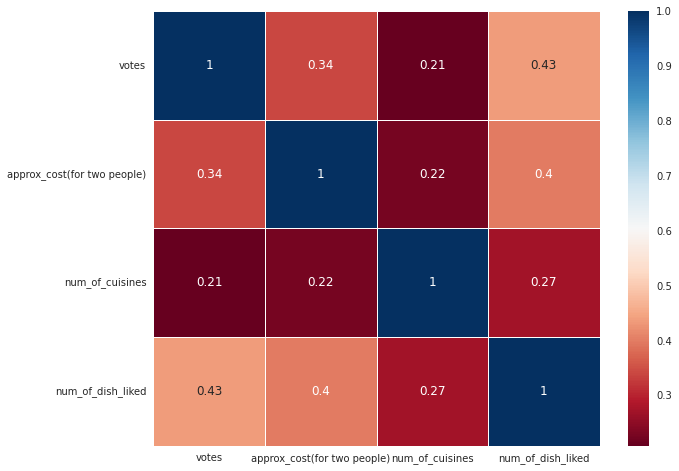

In [26]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)
    
correlation_matrix(df, num_cols)
# We don't have any high correlations in our numerical variables

In [27]:
# Outliers
# We have outlier values in some features but will not touch the outliers, cause we'll use decision tree methods those are not affected by them.

# Binary Encoding
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
                   and df[col].nunique() == 2 and col != 'label']
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

for col in binary_cols:
    df = label_encoder(df, col)

In [28]:
# One-Hot Encoding
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2 and col != 'num_of_cuisines'
            and col != 'num_of_dish_liked']
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
df = one_hot_encoder(df, ohe_cols)

In [29]:
# Robust Scaler
scaler = RobustScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# The regex code for editing the column names to avoid LightGBM warnings
df = df.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))

df.columns = [col.upper() for col in df.columns]

<span style="color:#12AD2B;font-size:36px;font-family:arial">Modeling</span>

AUC: 0.7188 (CART) 
AUC: 0.8606 (RF) 
AUC: 0.8287 (Adaboost) 
AUC: 0.8728 (GBM) 
AUC: 0.8703 (XGBoost) 
AUC: 0.8772 (LightGBM) 
AUC: 0.8714 (CatBoost) 


<AxesSubplot:xlabel='AUC', ylabel='Model'>

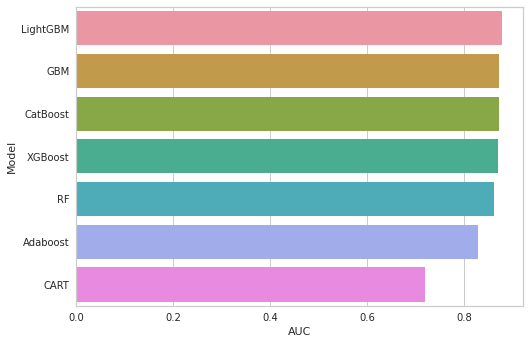

In [30]:
y = df["LABEL"]
X = df.drop(["LABEL"], axis=1)
meth = []
metric = []
# Base Models
classifiers = [("CART", DecisionTreeClassifier()),
               ("RF", RandomForestClassifier()),
               ('Adaboost', AdaBoostClassifier()),
               ('GBM', GradientBoostingClassifier()),
               ('XGBoost', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
               ('LightGBM', LGBMClassifier(force_col_wise=True)),
               ('CatBoost', CatBoostClassifier(verbose=False))
               ]

for name, classifier in classifiers:
    cv_results = cross_validate(classifier, X, y, cv=3, scoring=["roc_auc"])
    print(f"AUC: {round(cv_results['test_roc_auc'].mean(),4)} ({name}) ")
    metric.append(name)
    meth.append(round(cv_results['test_roc_auc'].mean(), 4))
base_df = pd.DataFrame(meth, metric).reset_index()
base_df.columns = ['Model', 'AUC']
base_df.sort_values("AUC", ascending=False, inplace=True)
sns.barplot(y='Model', x='AUC', data=base_df)

# Hyperparameter Optimization

In [31]:
cart_params = {'max_depth': range(8, 12),
               "min_samples_split": range(2, 8)}

rf_params = {"max_depth": [7, None],
             "min_samples_split": [2, 6, 10],
             "n_estimators": [500, 1000]}

# xgboost_params = {"max_depth": [7, 10],
#                   "n_estimators": [500, 1000],
#                   "colsample_bytree": [0.6, 0.8]}

lightgbm_params = {"learning_rate": [0.01, 0.1, 0.2],
                   "n_estimators": [300, 500, 1500],
                   "colsample_bytree": [0.5, 0.7, 1]}

catboost_params = {}

classifiers = [("CART", DecisionTreeClassifier(), cart_params),
               ("RF", RandomForestClassifier(), rf_params),
#                ('XGBoost', XGBClassifier(eval_metric='logloss', use_label_encoder=False), xgboost_params),
               ('LightGBM', LGBMClassifier(force_col_wise=True), lightgbm_params),
               ('CatBoost', CatBoostClassifier(verbose=False), catboost_params)
               ]

best_models = {}

########## CART ##########
ACCURACY (Before): 0.7188
F1 (Before): 0.7234
AUC (Before): 0.7195
ACCURACY (After): 0.7712
F1 (After): 0.7783
AUC (After): 0.8475
CART best params: {'max_depth': 8, 'min_samples_split': 4}

########## RF ##########
ACCURACY (Before): 0.764
F1 (Before): 0.7731
AUC (Before): 0.8599
ACCURACY (After): 0.7868
F1 (After): 0.7929
AUC (After): 0.8773
RF best params: {'max_depth': 7, 'min_samples_split': 6, 'n_estimators': 1000}

########## LightGBM ##########
ACCURACY (Before): 0.784
F1 (Before): 0.7909
AUC (Before): 0.8772
ACCURACY (After): 0.7893
F1 (After): 0.7959
AUC (After): 0.8813
LightGBM best params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'n_estimators': 500}

########## CatBoost ##########
ACCURACY (Before): 0.779
F1 (Before): 0.7894
AUC (Before): 0.8714
ACCURACY (After): 0.779
F1 (After): 0.7894
AUC (After): 0.8714
CatBoost best params: {}



<AxesSubplot:>

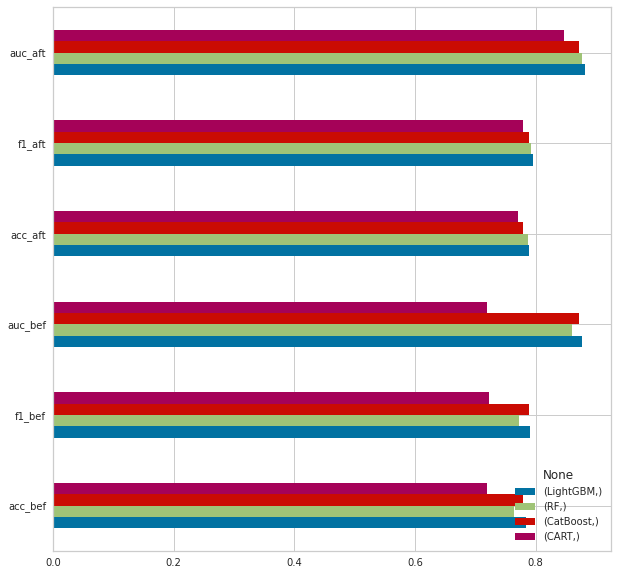

In [32]:
met_name, met_acc_bef, met_f1_bef, met_auc_bef, met_acc_aft, met_f1_aft, met_auc_aft = [], [], [], [], [], [], []
for name, classifier, params in classifiers:
    print(f"########## {name} ##########")
    cv_results = cross_validate(classifier, X, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])
    print(f"ACCURACY (Before): {round(cv_results['test_accuracy'].mean(),4)}")
    print(f"F1 (Before): {round(cv_results['test_f1'].mean(), 4)}")
    print(f"AUC (Before): {round(cv_results['test_roc_auc'].mean(), 4)}")
    met_name.append(name)
    met_acc_bef.append(round(cv_results['test_accuracy'].mean(), 4))
    met_f1_bef.append(round(cv_results['test_f1'].mean(), 4))
    met_auc_bef.append(round(cv_results['test_roc_auc'].mean(), 4))

    gs_best = GridSearchCV(classifier, params, cv=3, n_jobs=-1, verbose=False).fit(X, y)
    final_model = classifier.set_params(**gs_best.best_params_)

    cv_results = cross_validate(final_model, X, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])
    print(f"ACCURACY (After): {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"F1 (After): {round(cv_results['test_f1'].mean(), 4)}")
    print(f"AUC (After): {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
    best_models[name] = final_model

    met_acc_aft.append(round(cv_results['test_accuracy'].mean(), 4))
    met_f1_aft.append(round(cv_results['test_f1'].mean(), 4))
    met_auc_aft.append(round(cv_results['test_roc_auc'].mean(), 4))


hyp_df = pd.DataFrame(list(zip(met_acc_bef, met_f1_bef, met_auc_bef, met_acc_aft, met_f1_aft, met_auc_aft)),
                      columns=['acc_bef', 'f1_bef', 'auc_bef', 'acc_aft', 'f1_aft', 'auc_aft'], index=[met_name])
hyp_df.sort_values("auc_aft", ascending=False, inplace=True)
hyp_df.T.plot(kind='barh', figsize=(10, 10))

# Voting Classifier

In [33]:
voting_clf = VotingClassifier(
    estimators=[('CatBoost', best_models["CatBoost"]),
                ('RF', best_models["RF"]),
                ('LightGBM', best_models["LightGBM"])],
    voting='soft')

voting_clf.fit(X, y)

cv_results = cross_validate(voting_clf, X, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])
cv_results['test_accuracy'].mean()
cv_results['test_f1'].mean()
cv_results['test_roc_auc'].mean()

0.8806291635273045

# Feature Importances

In [34]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title(f'Feature Importances of {model}')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    0.7s finished


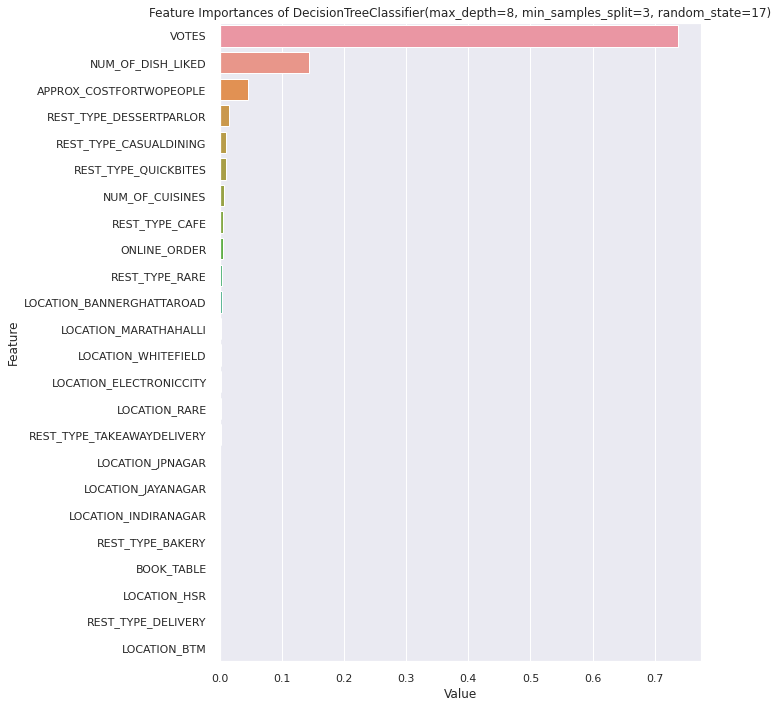

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   57.3s finished


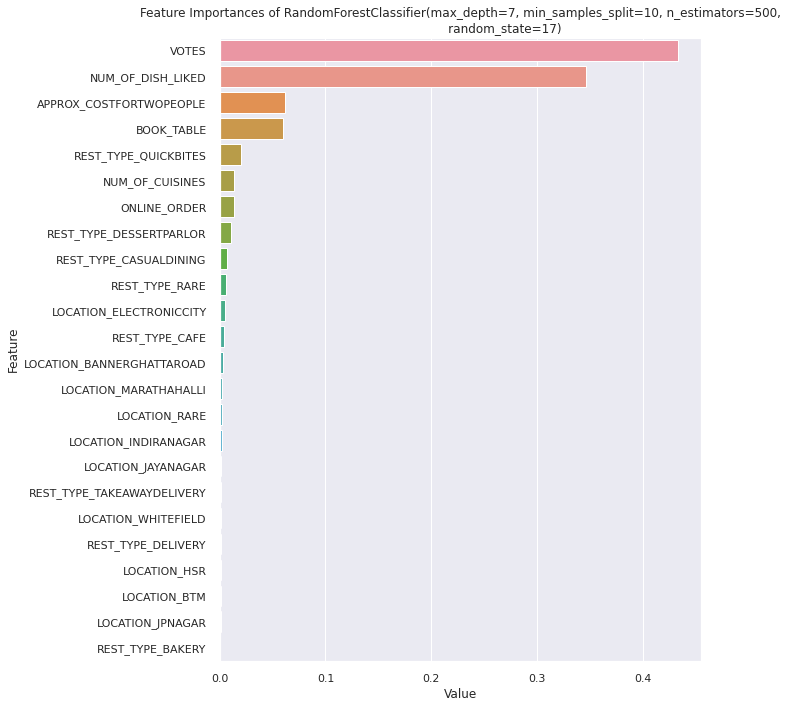

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   35.5s finished


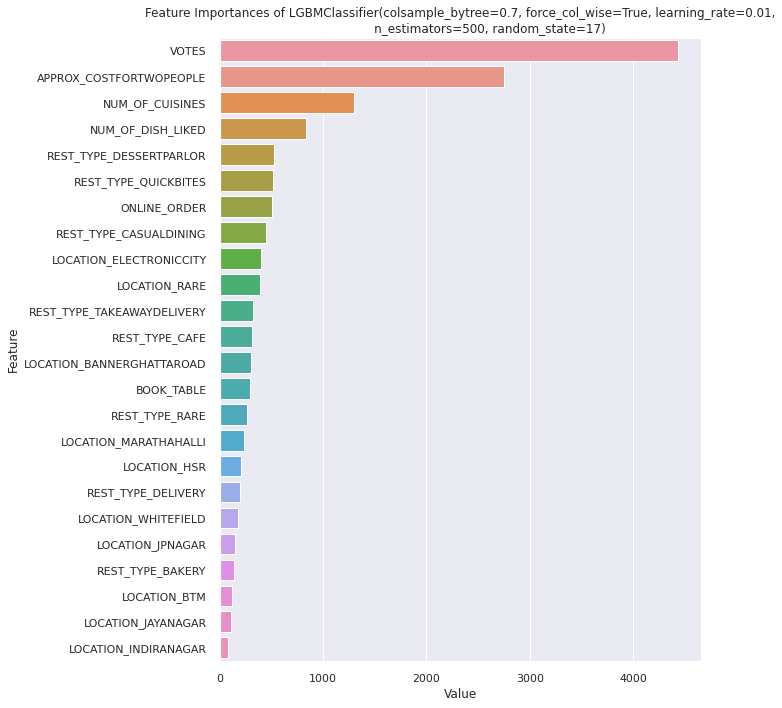

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.1s finished


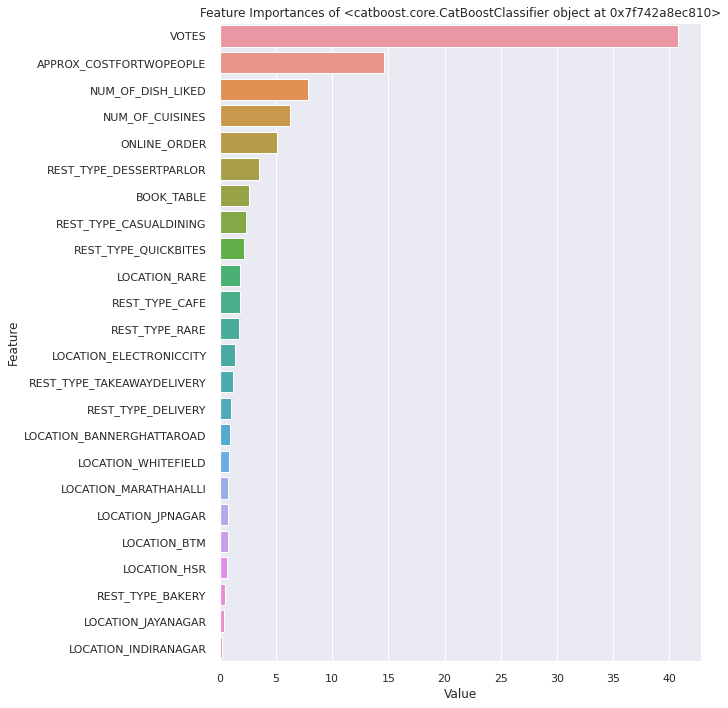

In [35]:
for name, classifier, params in classifiers:
    model = classifier
    model_best_grid = GridSearchCV(model,
                                   params,
                                   cv=3,
                                   n_jobs=-1,
                                   verbose=True).fit(X, y)

    final_model = model.set_params(**model_best_grid.best_params_, random_state=17).fit(X, y)
    plot_importance(final_model, X)

<span style="color:#12AD2B;font-size:36px;font-family:arial">Phase II</span>

<span style="color:#12AD2B;font-size:36px;font-family:arial">Restaurant Clustering with PCA & K-Means</span>

# Data Preprocessing & Feature Engineering

In [36]:
# There are slight differences in data preprocessing in this part

df = data.copy()
df = df.drop_duplicates(subset=['address', 'name']).reset_index().drop('index', axis=1)

# We can drop some columns those have no useful data.
drop_list = ['url', 'address', 'phone', 'reviews_list', 'menu_item', 'name', 'listed_in(city)', 'listed_in(type)']
df.drop(drop_list, axis=1, inplace=True)

df['approx_cost(for two people)'] = (df['approx_cost(for two people)'].str.replace(',', '')).astype('float64')

df['rate'] = df['rate'].replace('NEW', np.nan)
df['rate'] = df['rate'].replace('-', np.nan)
df['rate'] = (df['rate'].str.rstrip('/5')).astype('float64')

# dropping missing rates, we have enough data
df.dropna(subset=['rate'], inplace=True)

# we will drop the missing values for some features those have % 0.01 missing values.
df.dropna(subset=['rest_type', 'approx_cost(for two people)', 'cuisines'], inplace=True)

# new feature: number of the cuisines in restaurants
df['num_of_cuisines'] = [len(cui) for cui in df['cuisines'].str.split(',')]
# new feature: number of the dishes liked in restaurants
df['num_of_dish_liked'] = [len(dish) if dish is not np.NAN else 0 for dish in df['dish_liked'].str.split(',')]

# No measurement point, high cardinality.
df.drop('dish_liked', axis=1, inplace=True)
df.drop('cuisines', axis=1, inplace=True)

cat_cols, num_cols, cat_but_car = grab_col_names(df)

for col in ['num_of_cuisines', 'num_of_dish_liked']:
    num_cols.append(col)
num_cols.pop(0)  # rate
# We're gonna do clustering, so we're not gonna use the target feature

Observations: 9244
Variables: 9
cat_cols: 4
num_cols: 3
cat_but_car: 2
num_but_cat: 2


'rate'

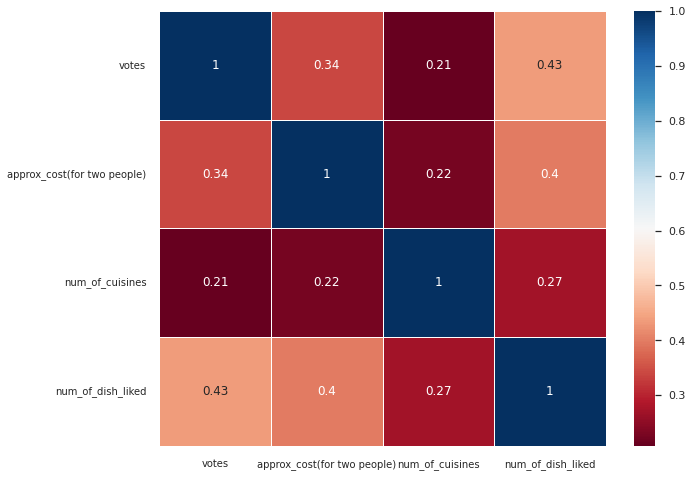

In [37]:
correlation_matrix(df, num_cols)
# We don't have any high correlations in our numerical variables

# Outliers

<AxesSubplot:xlabel='votes'>

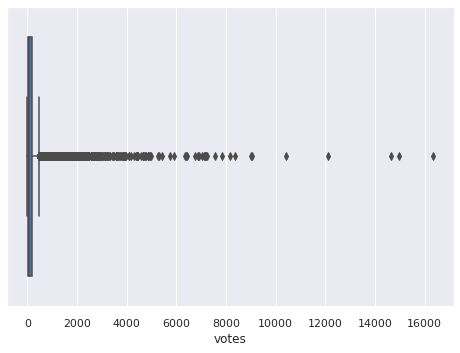

In [38]:
# Boxplot
# One of the best ways of checking for outliers is Boxplot
df["votes"].describe([0.05, 0.25, 0.45, 0.50, 0.65, 0.75, 0.95, 0.99]).T
sns.boxplot(x=df["votes"])

<AxesSubplot:xlabel='approx_cost(for two people)'>

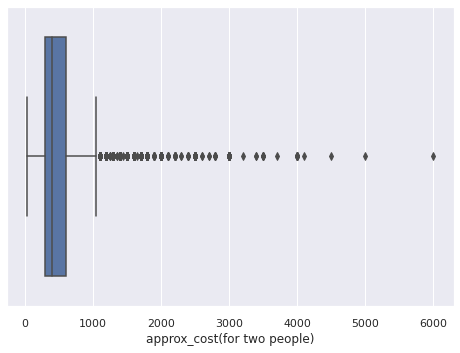

In [39]:
df["approx_cost(for two people)"].describe([0.05, 0.25, 0.45, 0.50, 0.65, 0.75, 0.95, 0.99]).T
sns.boxplot(x=df["approx_cost(for two people)"])

In [40]:
def outlier_thresholds(dataframe, col_name, q1=0.01, q3=0.85):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [41]:
remove_outlier(df, 'votes')
remove_outlier(df, 'approx_cost(for two people)')

,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),num_of_cuisines,num_of_dish_liked
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,800.0,3,7
1,Yes,No,4.1,787,Banashankari,Casual Dining,800.0,3,7
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",800.0,3,7
3,No,No,3.7,88,Banashankari,Quick Bites,300.0,2,1
4,No,No,3.8,166,Basavanagudi,Casual Dining,600.0,2,2
...,...,...,...,...,...,...,...,...,...
12492,No,No,3.2,5,"ITPL Main Road, Whitefield",Quick Bites,300.0,4,0
12493,Yes,No,3.8,182,"ITPL Main Road, Whitefield",Food Court,600.0,3,7
12495,No,Yes,4.2,411,Bellandur,Casual Dining,1800.0,3,7
12496,No,No,3.3,4,KR Puram,Quick Bites,350.0,3,0


In [42]:
inv_df = df
df = df[num_cols]

# Min-Max Scaler
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)

# PCA (Principal Component Analysis) - Dimension Reduction

In [43]:
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)
pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)
df = pd.DataFrame(pca_fit)

# K-Means

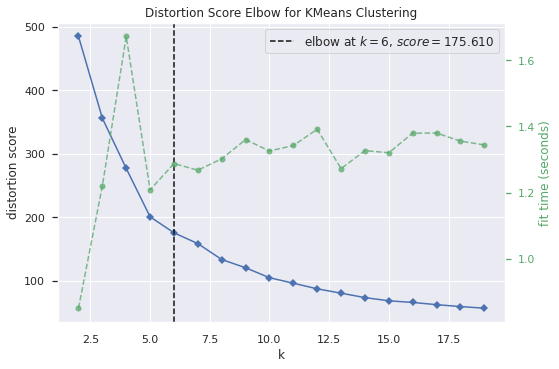

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
# Detecting Optimal Cluster Number

kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df)
elbow.show()

In [45]:
elbow.elbow_value_

6

# Final Clusters

In [46]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)
kumeler = kmeans.labels_

df["CLUSTER_NO"] = kumeler
df["CLUSTER_NO"] = df["CLUSTER_NO"] + 1

df.head()

,0,1,2,CLUSTER_NO
0,0.647502,-0.001768,0.000717,2
1,0.647533,-0.001755,0.000828,2
2,0.647873,-0.001603,0.002032,2
3,-0.225685,-0.031974,-0.022477,1
4,-0.080882,-0.048726,0.018308,3


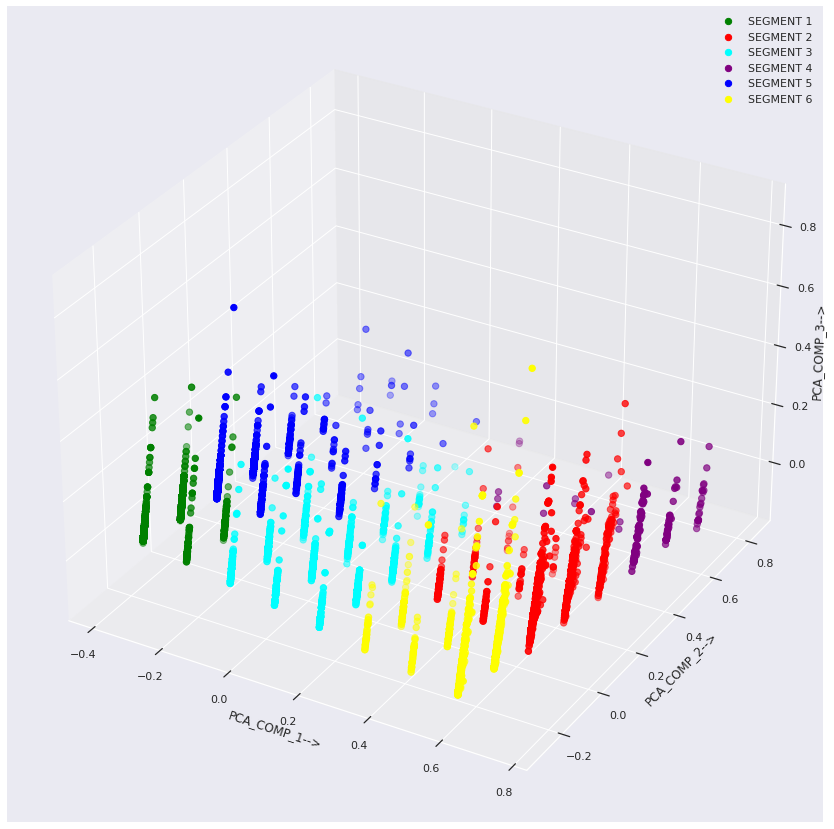

In [47]:
# 3d scatterplot using Matplotlib
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.loc[df['CLUSTER_NO'] == 1, 0], df.loc[df['CLUSTER_NO'] == 1, 1], df.loc[df['CLUSTER_NO'] == 1, 2],
           s=40, color='green', label="SEGMENT 1")
ax.scatter(df.loc[df['CLUSTER_NO'] == 2, 0], df.loc[df['CLUSTER_NO'] == 2, 1], df.loc[df['CLUSTER_NO'] == 2, 2],
           s=40, color='red', label="SEGMENT 2")
ax.scatter(df.loc[df['CLUSTER_NO'] == 3, 0], df.loc[df['CLUSTER_NO'] == 3, 1], df.loc[df['CLUSTER_NO'] == 3, 2],
           s=40, color='cyan', label="SEGMENT 3")
ax.scatter(df.loc[df['CLUSTER_NO'] == 4, 0], df.loc[df['CLUSTER_NO'] == 4, 1], df.loc[df['CLUSTER_NO'] == 4, 2],
           s=40, color='purple', label="SEGMENT 4")
ax.scatter(df.loc[df['CLUSTER_NO'] == 5, 0], df.loc[df['CLUSTER_NO'] == 5, 1], df.loc[df['CLUSTER_NO'] == 5, 2],
           s=40, color='blue', label="SEGMENT 5")
ax.scatter(df.loc[df['CLUSTER_NO'] == 6, 0], df.loc[df['CLUSTER_NO'] == 6, 1], df.loc[df['CLUSTER_NO'] == 6, 2],
           s=40, color='yellow', label="SEGMENT 6")

ax.set_xlabel('PCA_COMP_1-->')
ax.set_ylabel('PCA_COMP_2-->')
ax.set_zlabel('PCA_COMP_3-->')
ax.legend()

In [48]:
# Cluster Analysis
df.shape
inv_df.shape

inv_df['CLUSTER_NO'] = df['CLUSTER_NO'].astype('int64')
inv_df.head()
fin_df = inv_df.groupby('CLUSTER_NO')['rate', 'votes', 'approx_cost(for two people)', 'num_of_dish_liked',
                                      'num_of_cuisines'].mean()
fin_df.sort_values(by='rate', ascending=False)


,rate,votes,approx_cost(for two people),num_of_dish_liked,num_of_cuisines
CLUSTER_NO,,,,,
4.0,3.648000,472.330000,521.000000,3.280000,2.550000
6.0,3.607210,258.263323,539.070010,2.743992,2.440961
1.0,3.600304,275.308600,531.464612,2.639650,2.429985
2.0,3.597080,234.690693,553.375912,2.749088,2.428832
5.0,3.587170,267.370140,532.153966,2.584759,2.477449
3.0,3.555505,214.911697,528.967890,2.431193,2.436927


In [49]:
# Cluster	Comments
# 2.0	Optimal restaurants
# 4.0	Good but not affordable, high prices!
# 1.0	The second best option!
# 6.0	Average, not bad!
# 5.0	Low performance, high prices!
# 3.0	The last choice!

# Thanks for your interest!
# If you like this notebook, please like or leave a comment :)